In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

train_features_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
train_labels_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"

data = pd.read_csv(train_features_path, delim_whitespace=True, header=None)
labels = pd.read_csv(train_labels_path, header=None, names=["Activity"])

# Combine features and labels
features = data.copy()
features['Activity'] = labels['Activity']

# Display initial data structure
print(features.head(), features.shape)


          0         1         2         3         4         5         6  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

          7         8         9  ...       552       553       554       555  \
0 -0.983185 -0.923527 -0.934724  ... -0.298676 -0.710304 -0.112754  0.030400   
1 -0.974914 -0.957686 -0.943068  ... -0.595051 -0.861499  0.053477 -0.007435   
2 -0.963668 -0.977469 -0.938692  ... -0.390748 -0.760104 -0.118559  0.177899   
3 -0.982750 -0.989302 -0.938692  ... -0.117290 -0.482845 -0.036788 -0.012892   
4 -0.979672 -0.990441 -0.942469  ... -0.351471 -0.699205  0.123320  0.122542   

        556       557       558       559       560  Activity  
0 -0

Highly correlated features to drop: [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 59, 60, 61, 66, 67, 68, 70, 71, 72, 74, 75, 76, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 109, 113, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 146, 154, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 189, 193, 200, 201, 202, 203, 205, 206, 207, 208, 210, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 239, 240, 241, 242, 244, 245, 246, 249, 252, 253, 254, 255, 257, 258, 259, 260, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 297, 299, 301, 302, 303, 310, 311, 312, 313, 314, 315, 316, 317, 318, 324, 325, 326, 327, 328, 329, 330, 332, 338, 339, 340, 341, 342, 343,

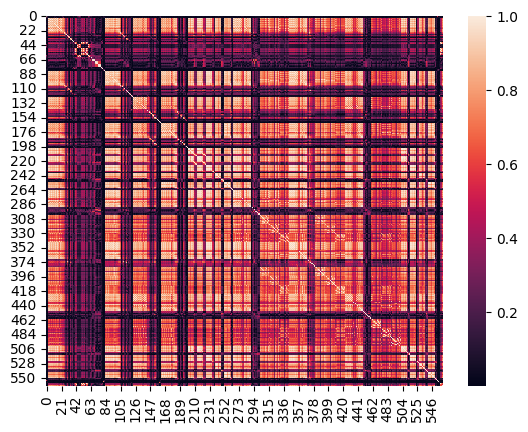

In [4]:
corr_matrix = features.corr().abs()
sns.heatmap(corr_matrix)

# Finding highly correlated features (>0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highly_correlated = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Highly correlated features to drop: {highly_correlated}")

# Removing correlated features
features_reduced = features.drop(columns=highly_correlated)
print(f"Reduced feature set shape: {features_reduced.shape}")


In [5]:
X = features.drop(columns=['Activity'])
y = features['Activity']

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X)
print(f"Number of components after PCA: {X_pca.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


Number of components after PCA: 67


In [13]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original feature shape: {X_train.shape}")
print(f"Reduced feature shape after PCA: {X_train_pca.shape}")


Original feature shape: (5881, 67)
Reduced feature shape after PCA: (5881, 35)


In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print("K-Fold Cross-Validation Results (After PCA):\n")

for model_name, model in models.items():
    scores = {
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1 Score": []
    }
    for train_idx, test_idx in kfold.split(X_train_pca, y_train):
        X_ktrain, X_ktest = X_train_pca[train_idx], X_train_pca[test_idx]
        y_ktrain, y_ktest = y_train.iloc[train_idx], y_train.iloc[test_idx]

        model.fit(X_ktrain, y_ktrain)
        y_pred = model.predict(X_ktest)

        for metric_name, metric_func in metrics.items():
            if metric_name == "Accuracy":
                scores[metric_name].append(metric_func(y_ktest, y_pred))
            else:
                scores[metric_name].append(metric_func(y_ktest, y_pred, average="weighted"))

    print(f"{model_name}:\n")
    for metric_name in metrics.keys():
        print(f"  {metric_name}: {np.mean(scores[metric_name]):.4f}")
    print("\n")


K-Fold Cross-Validation Results (After PCA):

Random Forest:

  Accuracy: 0.9386
  Precision: 0.9393
  Recall: 0.9386
  F1 Score: 0.9383


Decision Tree:

  Accuracy: 0.8633
  Precision: 0.8643
  Recall: 0.8633
  F1 Score: 0.8632


Logistic Regression:

  Accuracy: 0.9475
  Precision: 0.9480
  Recall: 0.9475
  F1 Score: 0.9474




C:\Users\Jeet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Jeet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jeet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecate

AdaBoost:

  Accuracy: 0.5387
  Precision: 0.4090
  Recall: 0.5387
  F1 Score: 0.4082




C:\Users\Jeet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.model_selection import LeaveOneGroupOut

subject_train_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"
subjects = pd.read_csv(subject_train_path, delim_whitespace=True, header=None).squeeze()

print(f"Subjects loaded. Shape: {subjects.shape}")
print(subjects.head())

logo = LeaveOneGroupOut()

print("Leave-One-Subject-Out Cross-Validation Results (After PCA):\n")


for model_name, model in models.items():
    scores = {
        "Accuracy": [],
        "Precision": [],
        "Recall": [],
        "F1 Score": []
    }
    for train_idx, test_idx in logo.split(X_train_pca, y_train, groups=subjects):
        X_ltrain, X_ltest = X_train_pca[train_idx], X_train_pca[test_idx]
        y_ltrain, y_ltest = y_train.iloc[train_idx], y_train.iloc[test_idx]

        model.fit(X_ltrain, y_ltrain)
        y_pred = model.predict(X_ltest)

        for metric_name, metric_func in metrics.items():
            if metric_name == "Accuracy":
                scores[metric_name].append(metric_func(y_ltest, y_pred))
            else:
                scores[metric_name].append(metric_func(y_ltest, y_pred, average="weighted"))

    print(f"{model_name}:\n")
    for metric_name in metrics.keys():
        print(f"  {metric_name}: {np.mean(scores[metric_name]):.4f}")
    print("\n")


Subjects loaded. Shape: (7352,)
0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64
Leave-One-Subject-Out Cross-Validation Results (After PCA):



ValueError: Found input variables with inconsistent numbers of samples: [5881, 5881, 7352]

In [22]:
valid_indices = ~y_train.isnull()  
X_train_valid = X_train[valid_indices]
y_train_valid = y_train[valid_indices]
subjects_valid = subjects[valid_indices]

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_valid)

print(f"Shapes after alignment:")
print(f"X_train_pca: {X_train_pca.shape}")
print(f"y_train_valid: {y_train_valid.shape}")
print(f"subjects_valid: {subjects_valid.shape}")


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore")

# --- 1. Load Data ---
train_features_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
train_labels_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"
subject_train_path = r"C:\Users\Jeet\Desktop\IIT_Gandhinagar\Dataset_Folder\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"

# Load features, labels, and subjects
X_train = pd.read_csv(train_features_path, delim_whitespace=True, header=None)
y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None).squeeze()
subjects = pd.read_csv(subject_train_path, delim_whitespace=True, header=None).squeeze()

print(f"Original Shapes: X_train={X_train.shape}, y_train={y_train.shape}, subjects={subjects.shape}")

# --- 2. Ensure Consistency in Data ---
valid_indices = ~y_train.isnull()  # Ensure no null values
X_train = X_train[valid_indices]
y_train = y_train[valid_indices]
subjects = subjects[valid_indices]

print(f"Aligned Shapes: X_train={X_train.shape}, y_train={y_train.shape}, subjects={subjects.shape}")

# --- 3. Apply PCA for Dimensionality Reduction ---
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)

print(f"Reduced Feature Shape after PCA: {X_train_pca.shape}")

# --- 4. Define Models and Metrics ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F1 Score": f1_score
}

# --- 5. K-Fold Cross-Validation ---
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

print("\n--- K-Fold Cross-Validation Results (After PCA) ---\n")
for model_name, model in models.items():
    scores = {metric: [] for metric in metrics.keys()}
    
    for train_idx, test_idx in kfold.split(X_train_pca, y_train):
        X_ktrain, X_ktest = X_train_pca[train_idx], X_train_pca[test_idx]
        y_ktrain, y_ktest = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model.fit(X_ktrain, y_ktrain)
        y_pred = model.predict(X_ktest)
        
        for metric_name, metric_func in metrics.items():
            if metric_name == "Accuracy":
                scores[metric_name].append(metric_func(y_ktest, y_pred))
            else:
                scores[metric_name].append(metric_func(y_ktest, y_pred, average="weighted"))
    
    print(f"{model_name}:")
    for metric_name in metrics.keys():
        print(f"  {metric_name}: {np.mean(scores[metric_name]):.4f}")
    print()

# --- 6. Leave-One-Subject-Out Cross-Validation (LOSO-CV) ---
logo = LeaveOneGroupOut()

print("\n--- Leave-One-Subject-Out Cross-Validation Results (After PCA) ---\n")
for model_name, model in models.items():
    scores = {metric: [] for metric in metrics.keys()}
    
    for train_idx, test_idx in logo.split(X_train_pca, y_train, groups=subjects):
        X_ltrain, X_ltest = X_train_pca[train_idx], X_train_pca[test_idx]
        y_ltrain, y_ltest = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model.fit(X_ltrain, y_ltrain)
        y_pred = model.predict(X_ltest)
        
        for metric_name, metric_func in metrics.items():
            if metric_name == "Accuracy":
                scores[metric_name].append(metric_func(y_ltest, y_pred))
            else:
                scores[metric_name].append(metric_func(y_ltest, y_pred, average="weighted"))
    
    print(f"{model_name}:")
    for metric_name in metrics.keys():
        print(f"  {metric_name}: {np.mean(scores[metric_name]):.4f}")
    print()


Original Shapes: X_train=(7352, 561), y_train=(7352,), subjects=(7352,)
Aligned Shapes: X_train=(7352, 561), y_train=(7352,), subjects=(7352,)
Reduced Feature Shape after PCA: (7352, 67)

--- K-Fold Cross-Validation Results (After PCA) ---

Random Forest:
  Accuracy: 0.9495
  Precision: 0.9500
  Recall: 0.9495
  F1 Score: 0.9493

Decision Tree:
  Accuracy: 0.8651
  Precision: 0.8654
  Recall: 0.8651
  F1 Score: 0.8651

Logistic Regression:
  Accuracy: 0.9697
  Precision: 0.9698
  Recall: 0.9697
  F1 Score: 0.9696

AdaBoost:
  Accuracy: 0.5521
  Precision: 0.5115
  Recall: 0.5521
  F1 Score: 0.4318


--- Leave-One-Subject-Out Cross-Validation Results (After PCA) ---

Random Forest:
  Accuracy: 0.8881
  Precision: 0.9046
  Recall: 0.8881
  F1 Score: 0.8812

Decision Tree:
  Accuracy: 0.7802
  Precision: 0.7961
  Recall: 0.7802
  F1 Score: 0.7754

Logistic Regression:
  Accuracy: 0.9217
  Precision: 0.9313
  Recall: 0.9217
  F1 Score: 0.9165

AdaBoost:
  Accuracy: 0.5348
  Precision: 0.34